In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generating fake data
np.random.seed(42)
num_samples = 100

In [12]:
data = pd.DataFrame({
    'avg_sales_amount': np.random.normal(500000, 100000, num_samples),
    'closed_listings': np.random.randint(10, 100, num_samples),
    'buyer_activity': np.random.randint(50, 150, num_samples),
    'seller_activity': np.random.randint(50, 150, num_samples),
    'property_type': np.random.randint(0, 3, num_samples)
})

In [13]:
# Presentation of preliminary data
print("Sample Data:", data.head())

Sample Data:    avg_sales_amount  closed_listings  buyer_activity  seller_activity  \
0     753869.110174               62              58              147   
1     552395.266711               80              97               74   
2     441191.317369               19             121              120   
3     486659.914211               54             108              101   
4     607099.646721               26             136               53   

   property_type  
0              2  
1              2  
2              0  
3              0  
4              2  


In [14]:
# traning using kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
data['behavior_cluster'] = kmeans.fit_predict(data)

In [15]:
# Analysis of results
print("\nCluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[3.51764081e+05 6.71250000e+01 9.90416667e+01 1.01166667e+02
  1.00000000e+00]
 [6.12335662e+05 5.68437500e+01 9.94687500e+01 1.02156250e+02
  1.28125000e+00]
 [4.73801180e+05 4.47727273e+01 9.92727273e+01 1.05522727e+02
  9.54545455e-01]]


In [16]:
# Distribution of the label for the blocks
cluster_map = {
    0: 'Buyer Dominance',
    1: 'Seller Dominance',
    2: 'Balanced Market'
}

In [17]:
# Naming Colors
data['behavior_label'] = data['behavior_cluster'].map(cluster_map)

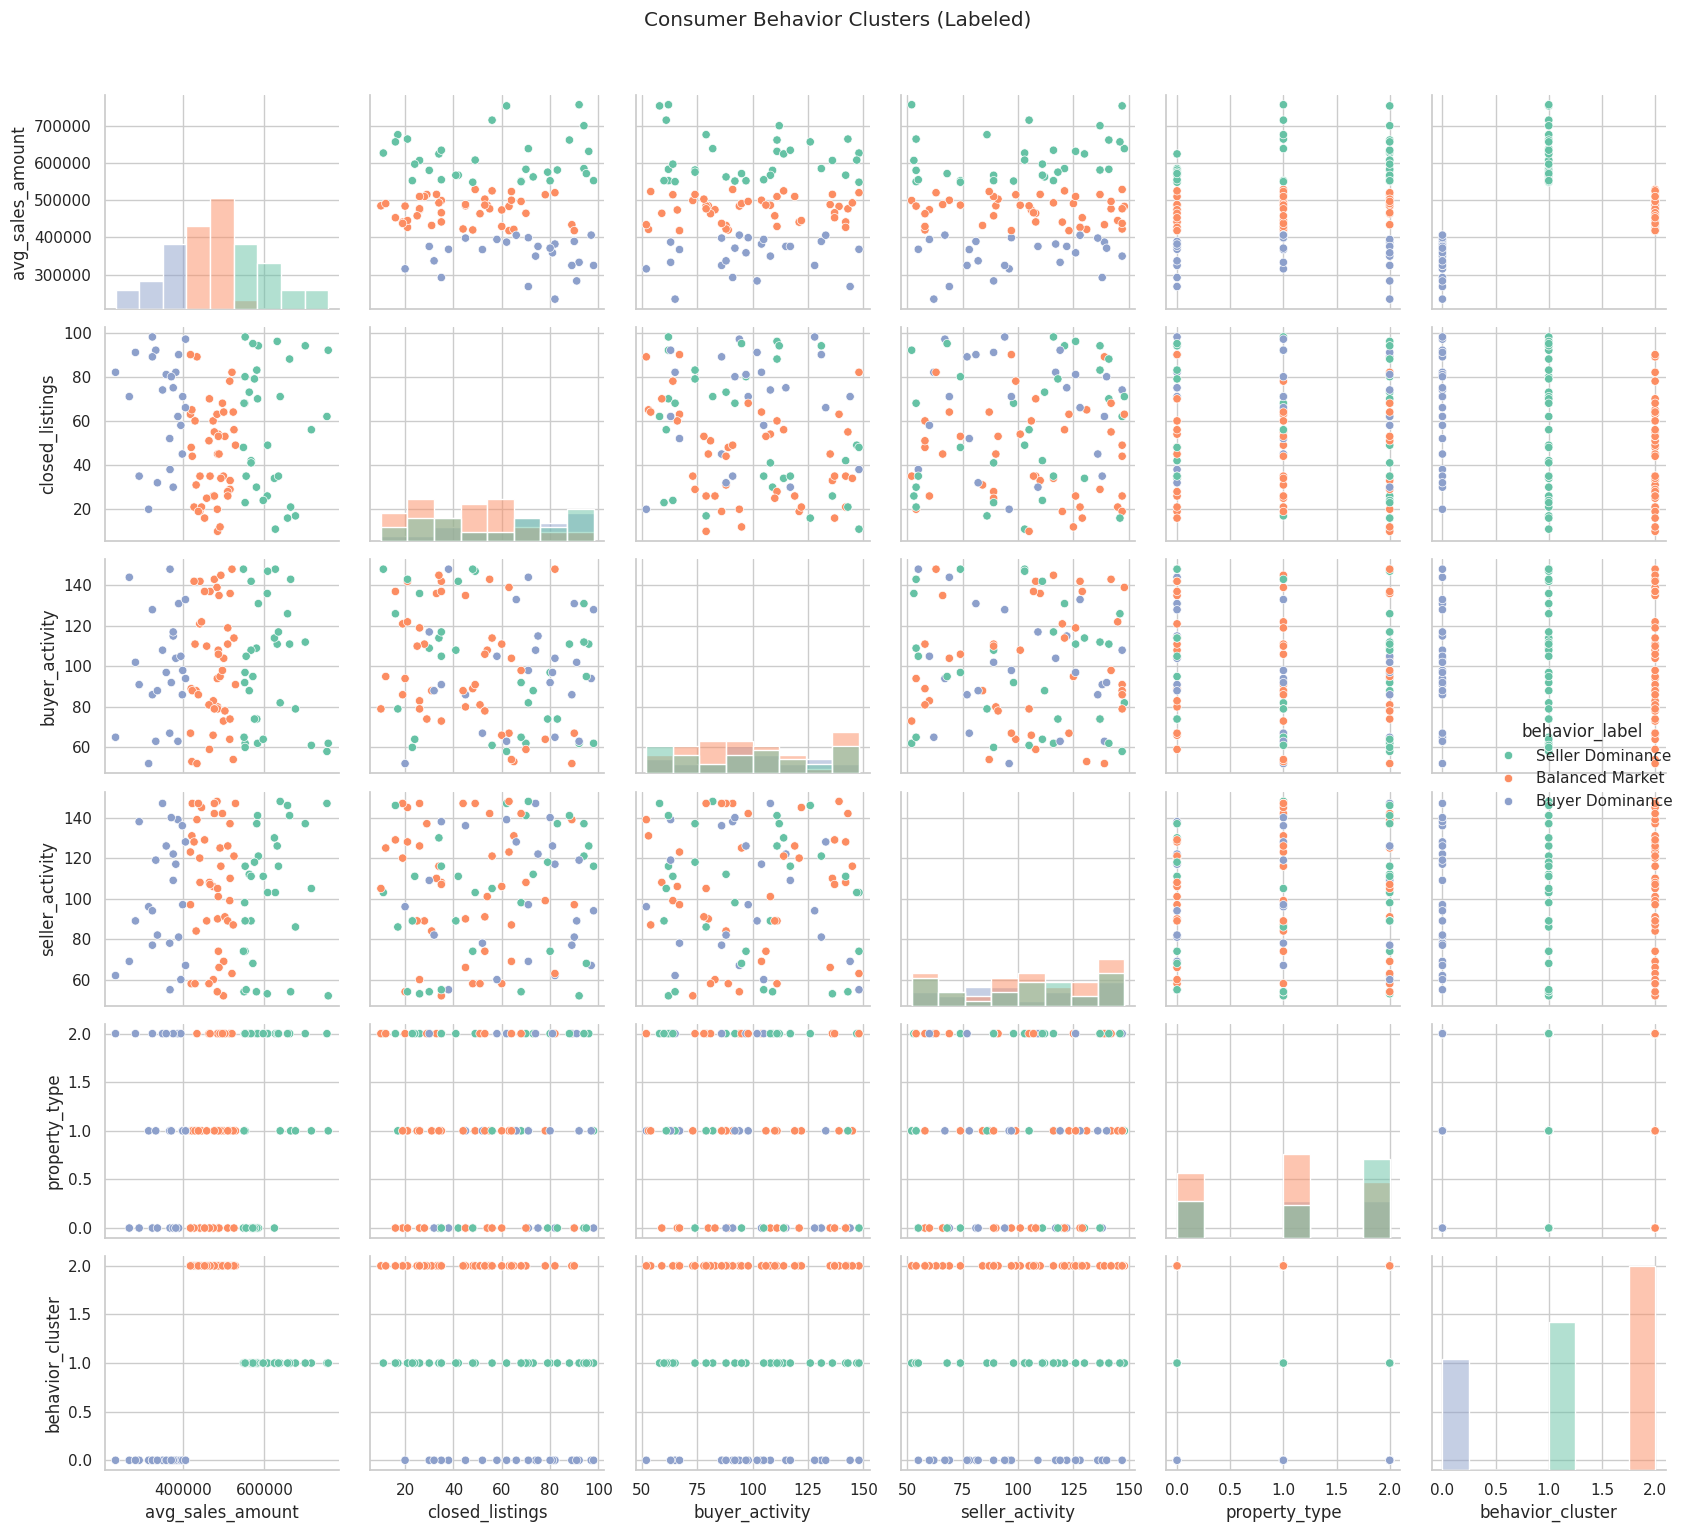

In [18]:
# Drawing groups
sns.set(style="whitegrid")
pair_plot_named = sns.pairplot(data, hue='behavior_label', palette='Set2', diag_kind='hist')
pair_plot_named.fig.suptitle("Consumer Behavior Clusters (Labeled)", y=1.02)
plt.tight_layout()
plt.show()